## RED WINE QUALITY PREDICTION

#### Problem Statement

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

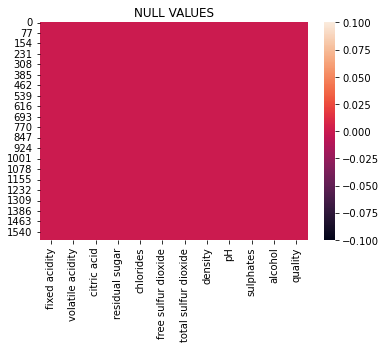

In [5]:
sns.heatmap(data.isnull())
plt.title('NULL VALUES')
plt.show()

so it can be observed that the dataset has no Na values present in the columns

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Checking Correlation

In [7]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


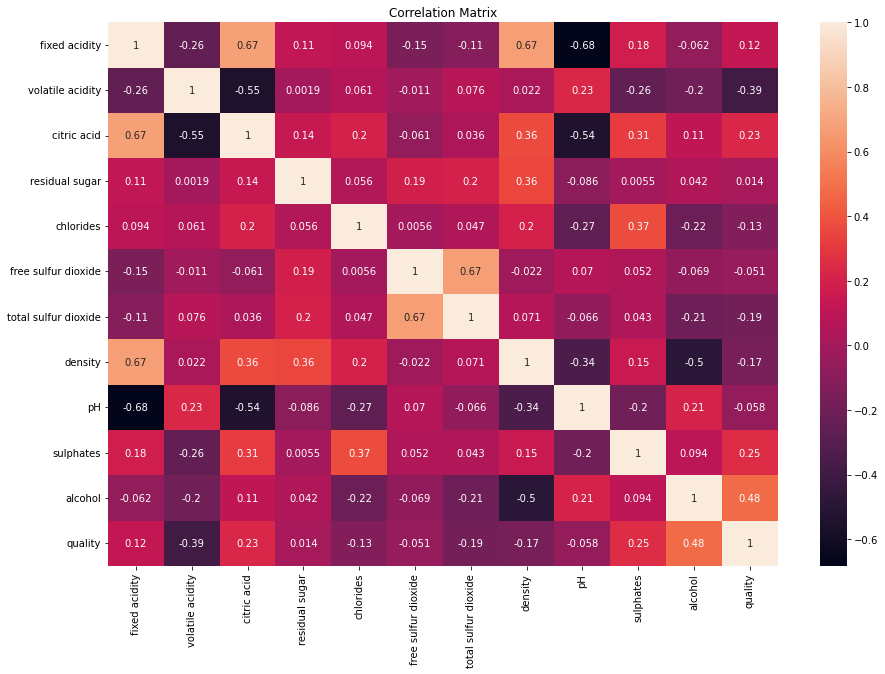

In [8]:
corr_mat = data.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr_mat,annot = True)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.jpg')
plt.show()

### Observations from the Correlation

1.fixed acidity is realated 12% to quality
2.volatile acidity is related -39% to the quality
3.citric acid is 23% related to the quality
4.residual sugar is 1.4 % related to the quality
5.chlorides is -13% related to the quality 6 free sulphur dixoide is-5.1% related to the quality
6.total sulfur dixoxide is -19% related to the quality 8 . density is -17% related to the quality.
7.pH is 5.8% related to the quality
8.sulphates is 25% related to the quality.
9.alchol is 48% related to the quality.


## Covariance analysis

<AxesSubplot:>

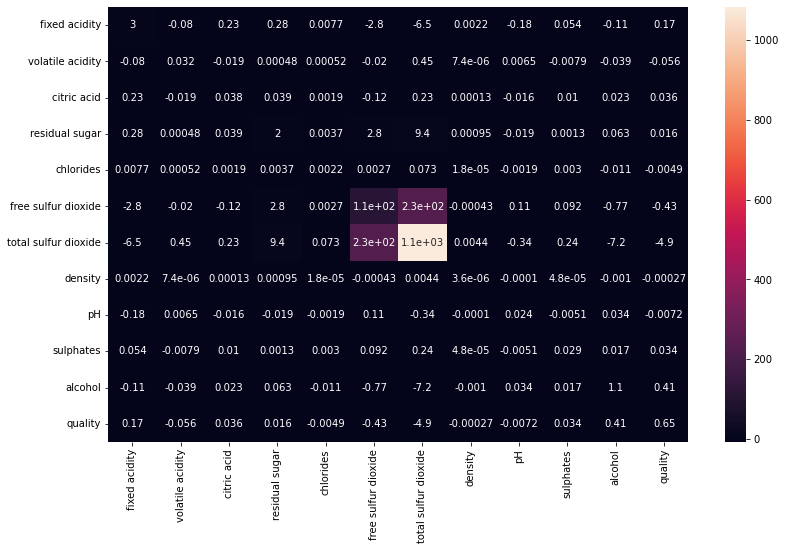

In [10]:
plt.figure(figsize = (13,8))
sns.heatmap(data.cov(), annot =True, )

In [12]:
# checking  the  datatypes  here 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## checking for outliers

<AxesSubplot:xlabel='alcohol'>

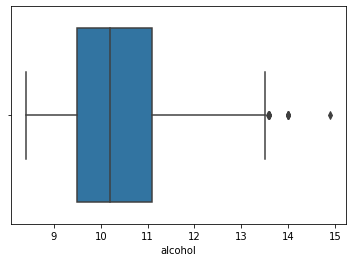

In [13]:
sns.boxplot(data.alcohol, orient='h')

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

<Figure size 720x648 with 0 Axes>

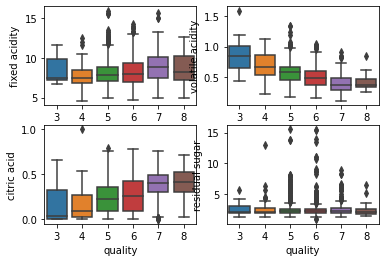

In [21]:
plt.figure(figsize=(10,9))

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2)
#create boxplot in each subplot
sns.boxplot(data=data, x='quality', y='fixed acidity', ax=axes[0,0])
sns.boxplot(data=data, x='quality', y='volatile acidity', ax=axes[0,1])
sns.boxplot(data=data, x='quality', y='citric acid', ax=axes[1,0])
sns.boxplot(data=data, x='quality', y='residual sugar', ax=axes[1,1])

<AxesSubplot:xlabel='quality', ylabel='density'>

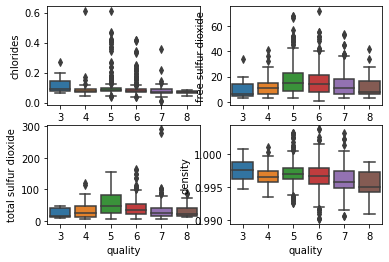

In [22]:
fig, axes = plt.subplots(2, 2)
#create boxplot in each subplot
sns.boxplot(data=data, x='quality', y='chlorides', ax=axes[0,0])
sns.boxplot(data=data, x='quality', y='free sulfur dioxide', ax=axes[0,1])
sns.boxplot(data=data, x='quality', y='total sulfur dioxide', ax=axes[1,0])
sns.boxplot(data=data, x='quality', y='density', ax=axes[1,1])

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

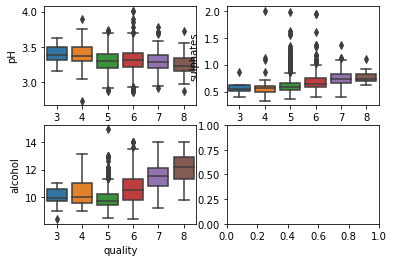

In [24]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2,2)
#create boxplot in each subplot
sns.boxplot(data=data, x='quality', y='pH', ax=axes[0,0])
sns.boxplot(data=data, x='quality', y='sulphates', ax=axes[0,1])
sns.boxplot(data=data, x='quality', y='alcohol', ax=axes[1,0])

So it can seen that all the columns has some less or more outliers in it whcih has to be removed for better model accuracy

## Checking for the Skewness in the Dataset

In [25]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

## Graph representation of the skewed columns

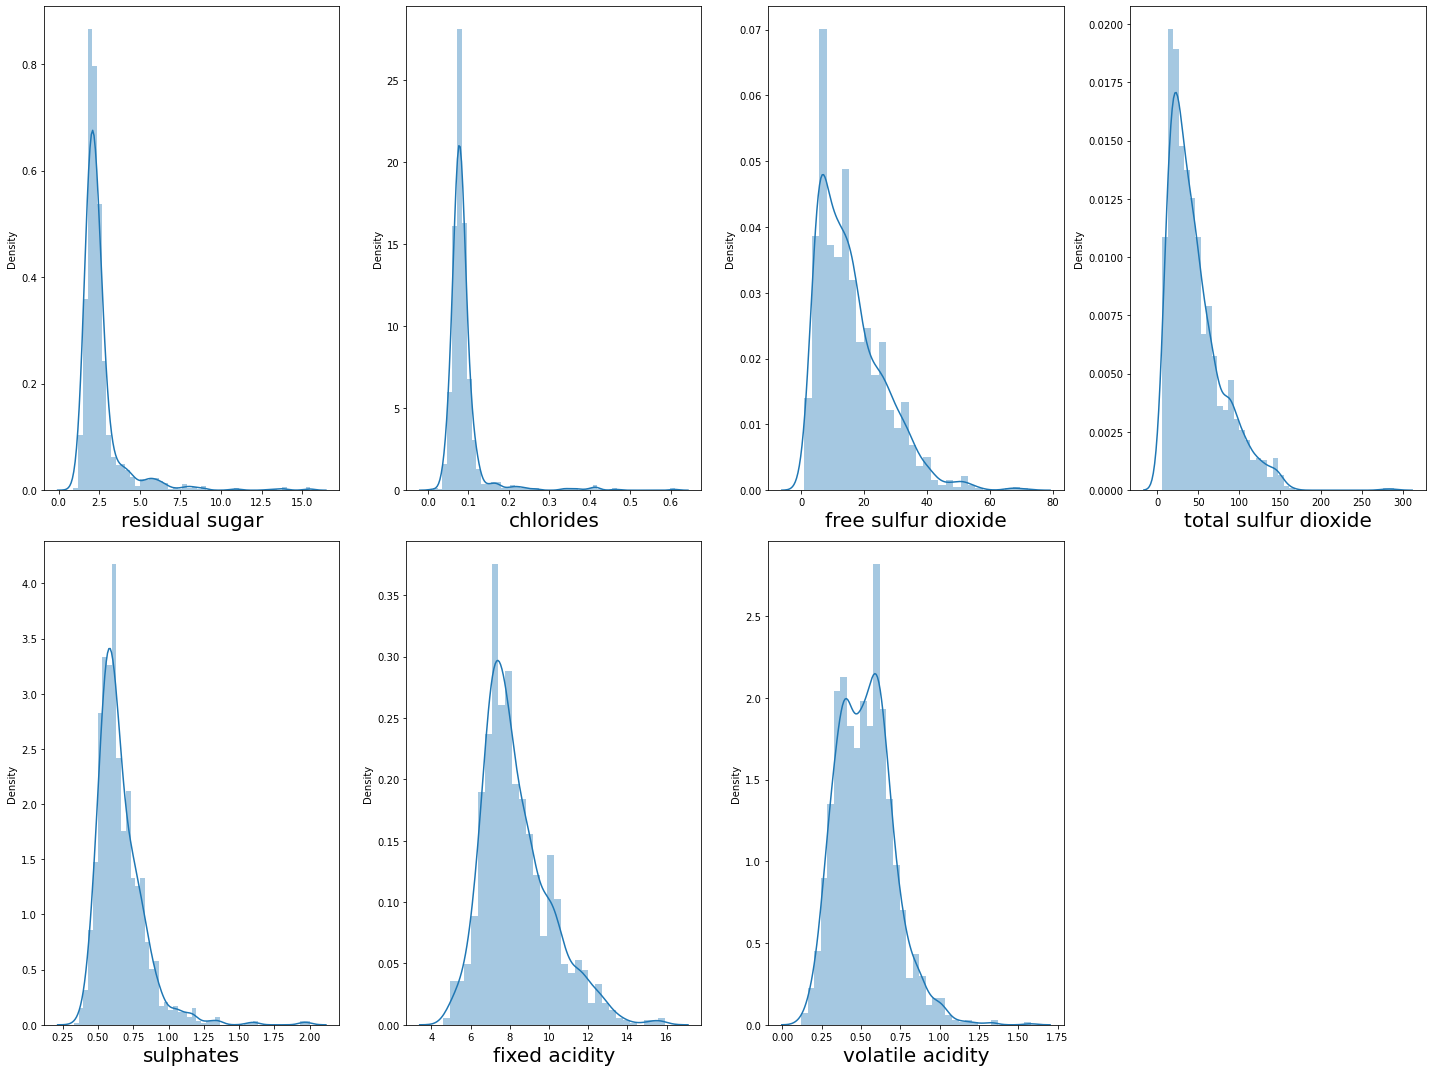

In [26]:
plt.figure(figsize=(20,15))
plotnumber = 1
for column in data[['residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','fixed acidity','volatile acidity']]:
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
        plotnumber += 1
        plt.tight_layout()

The curve here shows that the Data present in the columns does not follows the normal distributions thus it is a skewed data cols

## Data cleaning and preprocessing

In [27]:
data.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

## Removing Outliers

In [28]:
from scipy.stats import zscore

In [29]:
z= np.abs(zscore(data))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,0.787823
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,0.787823
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.450848
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,0.787823
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.450848
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.450848
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,0.787823


In [30]:
# if np.abs is not applied
# threshold = (-3,3)
# if applied np.abs
threshold = 3 #(standard)
# index number
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [31]:
len(np.where(z>3)[0])

192

In [32]:
data_new = data[(z<3).all(axis = 1)]

In [33]:
print('Old Dataframe',data.shape)
print('New Dataframe',data_new.shape)
print('Total_dropped_rows',data.shape[0] - data_new.shape[0])

Old Dataframe (1599, 12)
New Dataframe (1451, 12)
Total_dropped_rows 148


## Percentage Data loss

In [34]:
loss_percent = (1599-1451)/1599*100
print(loss_percent,'%')

9.255784865540964 %


In [35]:
data_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [36]:
# independent column
x = data_new.iloc[:,:-1]

In [37]:
# target
y = data_new.iloc[:,-1]

## Transforming data to remove skewness

In [38]:
from sklearn.preprocessing import power_transform

In [39]:
x = power_transform(x,method = 'yeo-johnson')

In [40]:
x

array([[-0.46787818,  1.05573967, -1.52450588, ...,  1.36086042,
        -0.58965734, -1.12042399],
       [-0.17080535,  1.91974976, -1.52450588, ..., -0.81650738,
         0.45152416, -0.5303401 ],
       [-0.17080535,  1.35706712, -1.24543379, ..., -0.38097654,
         0.22000451, -0.5303401 ],
       ...,
       [-1.45100718, -0.00286664, -0.66625579, ...,  0.74685493,
         0.93043194,  0.74288203],
       [-1.88546393,  0.76651828, -0.72755539, ...,  1.76243705,
         0.666655  , -0.03416625],
       [-1.7722373 , -1.33320495,  1.07130142, ...,  0.53899166,
         0.29909273,  0.74288203]])

In [41]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1451, dtype: int64

In [45]:
from sklearn.preprocessing import StandardScaler
# transfrom my dataset into standard normal distribution
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.46787818,  1.05573967, -1.52450588, ...,  1.36086042,
        -0.58965734, -1.12042399],
       [-0.17080535,  1.91974976, -1.52450588, ..., -0.81650738,
         0.45152416, -0.5303401 ],
       [-0.17080535,  1.35706712, -1.24543379, ..., -0.38097654,
         0.22000451, -0.5303401 ],
       ...,
       [-1.45100718, -0.00286664, -0.66625579, ...,  0.74685493,
         0.93043194,  0.74288203],
       [-1.88546393,  0.76651828, -0.72755539, ...,  1.76243705,
         0.666655  , -0.03416625],
       [-1.7722373 , -1.33320495,  1.07130142, ...,  0.53899166,
         0.29909273,  0.74288203]])

In [46]:
x.mean()

8.903486445211455e-19

In [47]:
pd.DataFrame(x).skew()

0     0.018666
1     0.004945
2     0.018049
3    -0.004606
4    -0.114658
5    -0.021455
6    -0.005813
7    -0.001043
8    -0.000074
9     0.020799
10    0.114658
dtype: float64

## Plotting the normal distribution curves

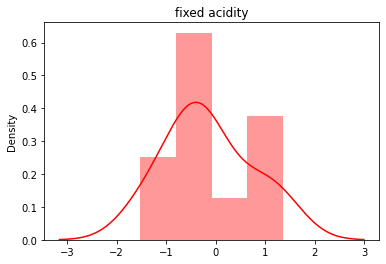

In [50]:
sns.distplot(x[0], color='red')
plt.title("fixed acidity")
plt.show()

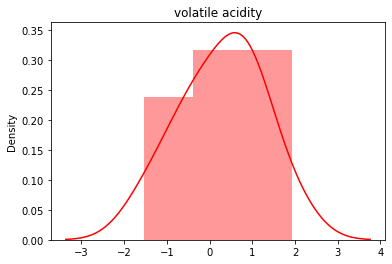

In [51]:
sns.distplot(x[1], color='red')
plt.title("volatile acidity")
plt.show()

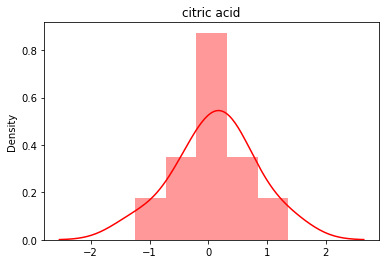

In [52]:
sns.distplot(x[2], color='red')
plt.title("citric acid")
plt.show()

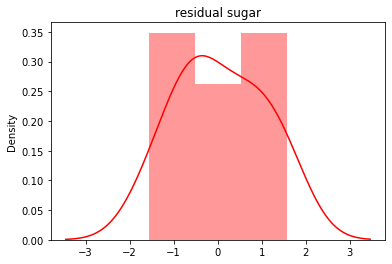

In [53]:
sns.distplot(x[3], color='red')
plt.title("residual sugar")
plt.show()

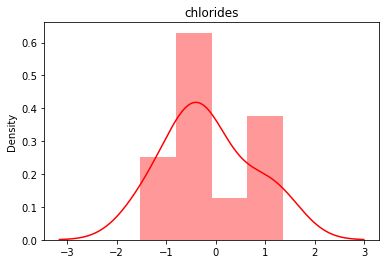

In [54]:
sns.distplot(x[4], color='red')
plt.title("chlorides")
plt.show()

so now we can see that the skewness from the Dataset has been removed and it is normally distributed.

## Creating our Model for prediction:

In [59]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

Splitting the Dataframe for the Training & Testing

In [64]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=3, test_size=0.25)

In [65]:
svc= SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test) 
print('accuracy_score', accuracy_score(y_pred,y_test))
print('confusion_matrix:', confusion_matrix(y_pred,y_test))
print('classification_report', classification_report(y_pred,y_test))

accuracy_score 0.650137741046832
confusion_matrix: [[  0   0   0   0   0]
 [ 10 127  38   3   0]
 [  3  37  93  27   3]
 [  0   0   5  16   1]
 [  0   0   0   0   0]]
classification_report               precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           5       0.77      0.71      0.74       178
           6       0.68      0.57      0.62       163
           7       0.35      0.73      0.47        22
           8       0.00      0.00      0.00         0

    accuracy                           0.65       363
   macro avg       0.36      0.40      0.37       363
weighted avg       0.71      0.65      0.67       363



#### Random Forest

In [67]:
rf= RandomForestClassifier(n_estimators=2000,criterion='gini',max_features=3, bootstrap=True , random_state=3)
rf.fit(x_train,y_train)
rf_pred= rf.predict(x_test)
print('accuracy_score', accuracy_score(rf_pred,y_test))
print('confusion_matrix:', confusion_matrix(rf_pred,y_test))
print('classification_report', classification_report(y_pred,y_test))

accuracy_score 0.7107438016528925
confusion_matrix: [[  0   0   0   0   0]
 [  9 137  31   3   0]
 [  4  26  97  19   3]
 [  0   1   8  24   1]
 [  0   0   0   0   0]]
classification_report               precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           5       0.77      0.71      0.74       178
           6       0.68      0.57      0.62       163
           7       0.35      0.73      0.47        22
           8       0.00      0.00      0.00         0

    accuracy                           0.65       363
   macro avg       0.36      0.40      0.37       363
weighted avg       0.71      0.65      0.67       363



#### AdaBoost

In [71]:
ab = AdaBoostClassifier(n_estimators=100,base_estimator=rf, learning_rate=0.001  ,random_state=3 )
ab.fit(x_train, y_train)
ab_pred= ab.predict(x_test)
print('accuracy_score', accuracy_score(ab_pred,y_test))
print('confusion_matrix:', confusion_matrix(ab_pred,y_test))
print('classification_report',classification_report(ab_pred,y_test))

accuracy_score 0.71900826446281
confusion_matrix: [[  0   0   0   0   0]
 [  9 138  31   3   0]
 [  4  25  97  17   3]
 [  0   1   8  26   1]
 [  0   0   0   0   0]]
classification_report               precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           5       0.84      0.76      0.80       181
           6       0.71      0.66      0.69       146
           7       0.57      0.72      0.63        36
           8       0.00      0.00      0.00         0

    accuracy                           0.72       363
   macro avg       0.42      0.43      0.42       363
weighted avg       0.76      0.72      0.74       363



#### KNN (K_nearest_neighbors)

In [80]:
Kn = KNeighborsClassifier(n_neighbors=21)
Kn.fit(x_train,y_train)
Kn_pred= Kn.predict(x_test)
print('this is  the accuracy_score', accuracy_score(Kn_pred,y_test))
print('this is  the confusion_matrix:', confusion_matrix(Kn_pred,y_test))
print('this is  the  classification_report',classification_report(Kn_pred,y_test))

this is  the accuracy_score 0.6253443526170799
this is  the confusion_matrix: [[  0   0   0   0   0]
 [  9 119  36   3   0]
 [  4  40  95  30   3]
 [  0   5   5  13   1]
 [  0   0   0   0   0]]
this is  the  classification_report               precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           5       0.73      0.71      0.72       167
           6       0.70      0.55      0.62       172
           7       0.28      0.54      0.37        24
           8       0.00      0.00      0.00         0

    accuracy                           0.63       363
   macro avg       0.34      0.36      0.34       363
weighted avg       0.68      0.63      0.65       363



### so from the all models we have got the best accuracy score out of Adaboostclassifier by using random forest
### as its base_estimator so we can take Adaboost as our main model

## Tuning Using Cross_validation:

In [81]:
pred_ab= ab.predict(x_test)
from sklearn.model_selection import cross_val_score
ab_score= accuracy_score(y_test, pred_ab)
for j in range(2,11):
    absscore= cross_val_score(ab,x,y,cv=j)
    abc= absscore.mean()
    print('at cv:',j)
    print('cross_validation_score is :',abc*100)
    print('Accuracy_score_is:',ab_score*100)
    print('\n')

at cv: 2
cross_validation_score is : 55.480478768880026
Accuracy_score_is: 71.900826446281


at cv: 3
cross_validation_score is : 56.85810675929254
Accuracy_score_is: 71.900826446281


at cv: 4
cross_validation_score is : 56.239821621539356
Accuracy_score_is: 71.900826446281


at cv: 5
cross_validation_score is : 58.376584903424586
Accuracy_score_is: 71.900826446281


at cv: 6
cross_validation_score is : 55.20301087068344
Accuracy_score_is: 71.900826446281


at cv: 7
cross_validation_score is : 57.621303816955994
Accuracy_score_is: 71.900826446281


at cv: 8
cross_validation_score is : 57.13754477566631
Accuracy_score_is: 71.900826446281


at cv: 9
cross_validation_score is : 56.99631078052979
Accuracy_score_is: 71.900826446281


at cv: 10
cross_validation_score is : 58.10344827586207
Accuracy_score_is: 71.900826446281




As we have tried doing the tuning and hypertuning but since the model doesnot gave better result thus we are taking our base model as Adaboost we have a accuracy of 0.71900826446281


### Roc_auc score for evaluation of our model

In [82]:
from sklearn.metrics import roc_auc_score

In [83]:
ab_pred_proba= ab.predict_proba(x_test)

In [84]:
roc_auc_score(y_test, ab_pred_proba,multi_class='ovr')

0.8495777650003469

Thus the score here is 84.9% which is good overall

#### Model Saving in system

In [86]:
import pickle
filename = 'red_wine_model'
pickle.dump(ab, open(filename, 'wb'))

### Conclusion prediction by the Model

In [87]:
a = np.array(y_test)
predicted = np.array(ab.predict(x_test))
df_wine = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_wine

,orginal,predicted
0,4,5
1,5,5
2,6,6
3,5,5
4,6,6
...,...,...
358,7,6
359,5,6
360,6,5
361,6,6
